# Linear Regression Predict Future Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2021-12-23'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,147.000000,147.929993,137.020004,138.639999,138.639999,63369600
2021-12-17,136.300003,142.039993,136.110001,137.750000,137.750000,55642100
2021-12-20,135.970001,138.259995,133.520004,135.800003,135.800003,38195400
2021-12-21,138.190002,144.500000,135.149994,144.250000,144.250000,57785200
2021-12-22,142.649994,144.500000,140.270004,143.880005,143.880005,46923700


In [4]:
df['Numbers'] = list(range(0, len(df)))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Numbers
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,0
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,2
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,3
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,4


In [5]:
X = np.array(df[['Numbers']])
y = df['Close'].values

In [6]:
model = LinearRegression().fit(X,y)

In [7]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: -21.651840699011544
Slope: [0.05082415]


In [8]:
# y = mx + b
y_pred = model.coef_ * X + model.intercept_ 
df['Pred'] = y_pred


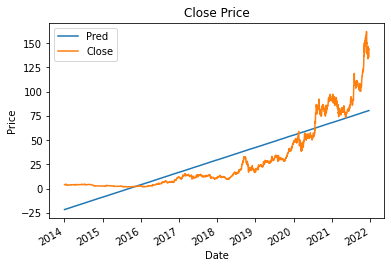

In [9]:
df['Pred'].plot()
df['Close'].plot()
plt.title('Close Price')
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [10]:
print('Model Accuracy:')
r2_score(df['Close'], df['Pred'])

Model Accuracy:


0.732059924835964

In [11]:
model.coef_ * len(df)+1 + model.intercept_

array([81.45387442])